# Group Project



Formar grupos de 2, máximo 3 pessoas.

**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata


**Objectivo:** Usar técnicas de regressão para prever a rating de um filme com base em diferentes características.


**Notas importantes**
    
    1. Usar a coluna "vote_average" como target.
    2. Usar técnicas de regressão para prever a rating (vote_average) que um filme terá com base em diferentes caracteristicas.
    
**Recomendações**
    
    1. Não é necessário, nem recomendável, usar todas as features disponíveis (especialmente as que não são númericas).
    2. O exercício pode demorar muito ou pouco tempo, dependendo da exploração que for feita. Não é esperado que sejam explorados todos os detalhes, nem todas as abordagens possíveis.
    3. Se houver falta de tempo para explorar tudo o que gostariam, ou querem fazer alguma técnica que iria levar muito tempo, expliquem por escrito qual era a ideia e o que esperariam obter.
    4. Tentem explicar o máximo possível o racícionio por detrás de todos os passos que afectuarem.
    5. Acima de tudo, divirtam-se!
    
**Perguntas**

    1. Quantos filmes existem no dataset? E quantas features?
    2. Existem variáveis que não são independentes entre si?
    3. Qual a técnica de regressão que levou a melhores resultados?
    4. Quais os factores que mais contribuem para o sucesso de um filme?
    5. Recomendariam o vosso modelo a uma produtora de filmes?
    

---

# Importação de Bibliotecas

---

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Constantes

---

Caso necesite correr o presente notebook no Google Colab, inicializar a variavel `use_google_colab` a true.

In [76]:
use_google_colab = False
seed = 42

In [77]:
if use_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    datapath = '/content/drive/My Drive/Fundamentos_ML_Dados/tmdb_5000_movies.csv'
else:
    datapath = 'tmdb_5000_movies.csv'

Importação da fonte de dados

In [78]:
df = pd.read_csv(datapath)

# 1. Quantos filmes existem no dataset? E quantas features?

---

Apresentar aleatóriamente 10 registos para analisar formato de dados.

In [79]:
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4570,439000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 35, ""n...",NaN,3062,"[{""id"": 276, ""name"": ""philadelphia""}, {""id"": 4...",en,42nd Street,A producer puts on what may be his last Broadw...,1.933366,"[{""name"": ""Warner Bros."", ""id"": 6194}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1933-02-02,2281000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,42nd Street,6.1,37
2882,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,16857,"[{""id"": 10183, ""name"": ""independent film""}]",en,The Dangerous Lives of Altar Boys,"A group of Catholic school friends, after bein...",2.248880,"[{""name"": ""Egg Pictures"", ""id"": 802}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-06-14,0,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Dangerous Lives of Altar Boys,6.4,53
1873,25500000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,190955,[],en,Blood Ties,"Two brothers, on either side of the law, face ...",12.756344,"[{""name"": ""Wild Bunch"", ""id"": 856}, {""name"": ""...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2013-08-22,2415472,128.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Crime runs in the family.,Blood Ties,6.0,171
347,100000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://www.cloudywithachanceofmeatballs.com/,22794,"[{""id"": 3694, ""name"": ""weather""}, {""id"": 10637...",en,Cloudy with a Chance of Meatballs,Inventor Flint Lockwood creates a machine that...,46.781182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-09-17,242988466,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to get served.,Cloudy with a Chance of Meatballs,6.5,1747
990,50000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",NaN,10533,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Scarlet Letter,"Set in puritanical Boston in the mid 1600s, th...",7.442680,"[{""name"": ""Hollywood Pictures"", ""id"": 915}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-10-13,10382407,135.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When intimacy is forbidden and passion is a si...,The Scarlet Letter,5.5,108


Nº  Features são apenas 18, porque o id é apenas um  identificador, e a coluna targetnão é considerado uma feature.

In [80]:
print(f'Nº de Filmes:{df.shape[0]}')
print(f'Nº de features :{df.shape[1]-2}')

Nº de Filmes:4803
Nº de features :18


Verificação se id não contem numero repetidos.

In [81]:
len(df["id"].unique())

4803

# 2. Existem variáveis que não são independentes entre si?

---

O código inicia a análise exploratória dos dados ao selecionar apenas as variáveis numéricas do DataFrame df. A variável "id" é removida por não ser relevante para a análise de correlação, visto que geralmente representa um identificador único. Em seguida, calcula-se a matriz de correlação utilizando o método de Spearman, que é mais apropriado para relações não lineares entre as variáveis. Para facilitar a visualização, é gerado um heatmap com as correlações calculadas

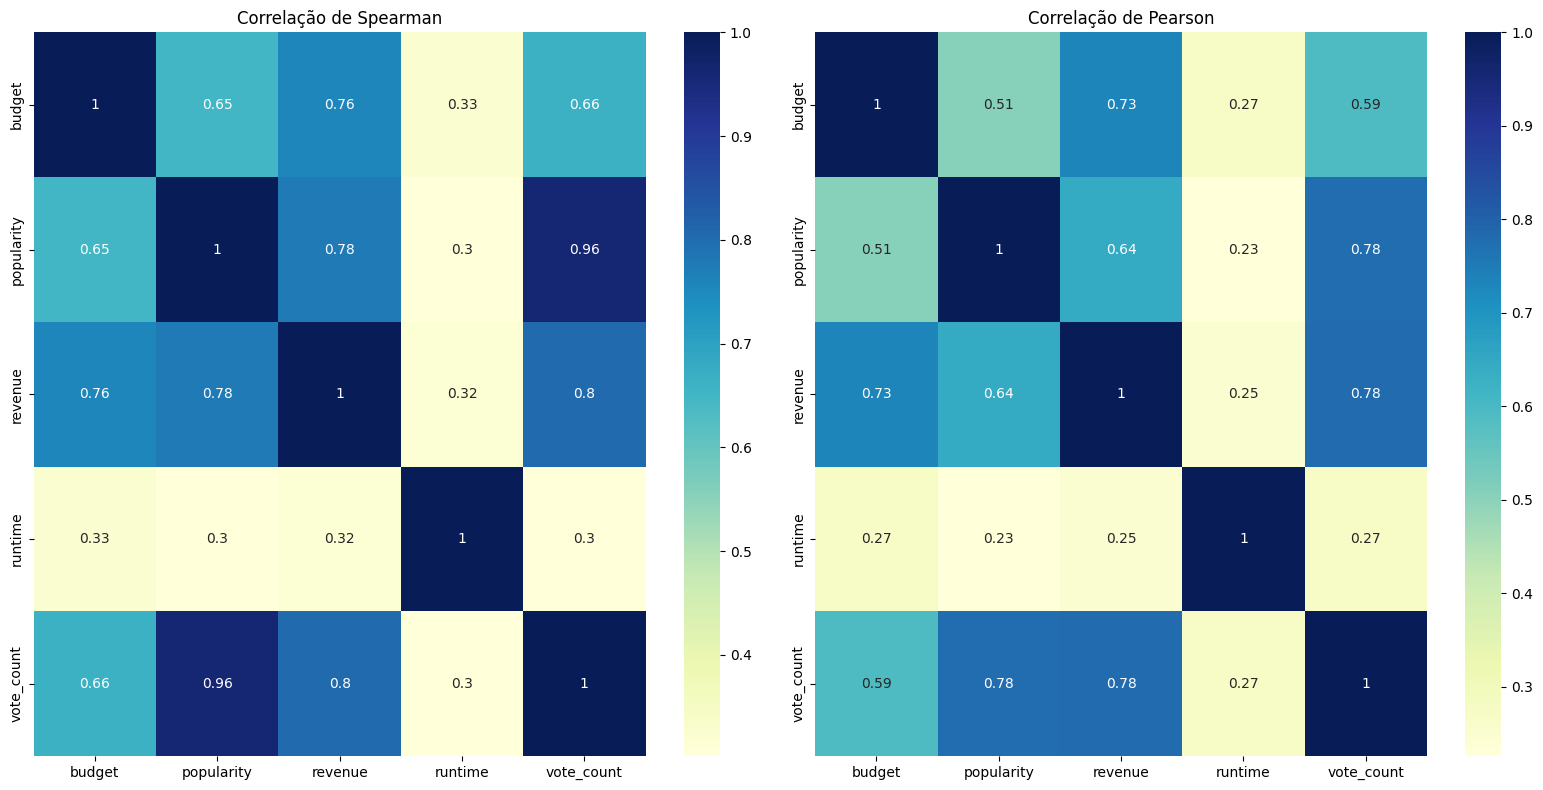

In [82]:
numeric_df = df.select_dtypes(include=['number'])
var_to_remove = ["id","vote_average"]
numeric_var_df = numeric_df.drop(var_to_remove, axis=1)
spearman_corr = numeric_var_df.corr(method='spearman')

# Criar figura com subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap de correlação de Spearman
sns.heatmap(spearman_corr, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Correlação de Spearman")

# Heatmap de correlação de Pearson (padrão)
pearson_corr = numeric_var_df.corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Correlação de Pearson")

# Exibir gráficos
plt.tight_layout()
plt.show()

Sim, existem variaveis que não são independentes entre si, (popularity and vote_count), (revenue and vote count), (budget and revenue) and  (revenue and popularity)

Com base nos heatmaps de correlação apresentados, é possível identificar que algumas variáveis não são independentes entre si, pois apresentam uma correlação forte tanto pelo método de Spearman como pelo  método de Pearson.

Uma das relações mais evidentes é entre budget (orçamento) e revenue (receita), onde ambas as métricas mostram uma forte correlação positiva. Isto indica que filmes com maior orçamento tendem a gerar mais receita, o que faz sentido do ponto de vista da indústria cinematográfica, onde produções com maior investimento costumam ter mais publicidade e distribuição.

Outra relação clara é entre popularity (popularidade) e vote_count (número de votos). A correlação extremamente elevada sugere que filmes mais populares recebem um maior número de votos, o que pode ser explicado pelo facto de filmes com mais visualizações e audiência terem naturalmente um maior volume de avaliações.

Adicionalmente, verifica-se uma relação forte entre vote_count e revenue, o que indica que filmes que recebem mais votos geralmente também geram mais receita. Isto pode ser um reflexo do maior envolvimento do público com filmes bem-sucedidos financeiramente.

No geral, as variáveis budget, revenue, popularity e vote_count não são independentes, pois apresentam fortes relações entre si. 

---

# 3. Qual a técnica de regressão que levou a melhores resultados?

---

Antes de avançarmos para a análise da melhor técnica de regressão, foi realizada uma verificação para identificar a existência de valores nulos no conjunto de dados.

In [83]:
print(f"Nº de valores nulos em cada coluna:\n{numeric_df.isnull().sum()}\n")

Nº de valores nulos em cada coluna:
budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64



Foi possível identificar a existência de valores nulos na variável runtime. Assim, procedeu-se à análise da sua distribuição para determinar a melhor abordagem para a imputação desses valores.

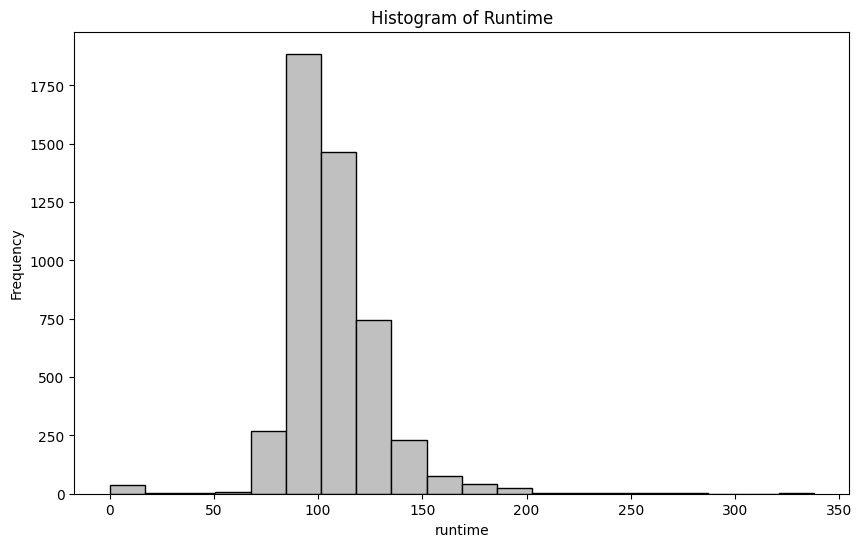

In [84]:
# Create histogram variable RunTime
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=20, color='silver', edgecolor='black')
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime')
plt.show()

Abaixo são apresentadas algumas estatísticas descritivas da variável.

In [85]:
runtime_description = df['runtime'].describe()
runtime_description

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Verificação do valor da Kurtosis e Skewness 

In [86]:
# create kurtosis and skewness variable runtime
kurtosis = df['runtime'].kurtosis()
skewness = df['runtime'].skew()

print(f"Kurtosis of runtime: {kurtosis}")
print(f"Skewness of runtime: {skewness}")

Kurtosis of runtime: 8.935448828134865
Skewness of runtime: 0.7159565062897394


A valor Kurtosis (8,94) confirma que a distribuição tem caudas longas, o que reforça a ideia de que existem valores extremos que podem influenciar a média, olhando para a Skewness (0.72) indica indica que a distribuição não é simétrica e está enviesada para valores mais altos. Dado que a distribuição não é normal e contém outliers, a imputação pela mediana (103 minutos) é a opção mais apropriada. A mediana não é afetada pelos valores extremos, garantindo que os valores imputados sejam mais representativos da distribuição real dos dados

 O código abaixo preenche os valores nulos (NaN) da variável runtime com a sua mediana.

In [87]:
# Fill NaN values in 'runtime' with the median
numeric_df['runtime'] = numeric_df['runtime'].fillna(numeric_df['runtime'].median())

Verificação se ainda existem valores nulos.

In [88]:
print(f"Nº de valores nulos em cada coluna:\n{numeric_df.isnull().sum()}\n")

Nº de valores nulos em cada coluna:
budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64



Após o tratamento dos dados, o código abaixo divide o conjunto de dados numérico (numeric_df), reservando 20% para o conjunto de teste (test_set) e 80% para treino (train_set), garantindo que a separação seja aleatória e reprodutível através da fixação da seed.
São removidas as variaveis `id` e `vote_average` dos dataframes x_train e x_test.

In [89]:
train_set, test_set = train_test_split(numeric_df, test_size=0.2, random_state=seed)
# Caso pretenda correr apenas uma parte dos dados, preencher o parametro frac com um valor entre 0 e 1
train_set = train_set.sample(frac=1, random_state=seed)

X_train = train_set.drop(columns=var_to_remove)
y_train = train_set['vote_average']
X_test = test_set.drop(columns=var_to_remove)
y_test = test_set['vote_average']

O código define um conjunto de modelos de regressão juntamente com os seus hiperparâmetros para otimização. Cada modelo está armazenado numa estrutura de dados que inclui um nome identificador, a instância do modelo e um dicionário de hiperparâmetros a serem testados durante o processo de ajuste.

Os modelos incluídos são os seguintes:

`Rede Neural Artificial (ANN - MLPRegressor)`

Utiliza uma rede neural perceptron multicamada (MLP) como regressor.
Aplica normalização (MinMaxScaler()) antes do treino.
Os hiperparâmetros testados incluem diferentes estruturas de camadas ocultas (ex.: (20,), (20,40,60), etc.) e o número máximo de iterações (100 ou 1000).

`Random Forest Regressor`

Baseado num conjunto de árvores de decisão para regressão.
Os hiperparâmetros testados incluem:
Número de árvores (n_estimators): 10, 50, 100 ou 300.
Profundidade máxima (max_depth): 2, 4, 6 ou 10.
Número mínimo de amostras para dividir um nó (min_samples_split): 5.
Número mínimo de amostras numa folha (min_samples_leaf): 4.

`Decision Tree Regressor`

Utiliza uma árvore de decisão para regressão.
Os hiperparâmetros testados incluem:
Profundidade máxima (max_depth): 2, 4, 6 ou 8.
Critério de divisão (criterion): squared_error ou absolute_error.
Tipo de divisão (splitter): "best" (melhor divisão) ou "random" (divisão aleatória).

`Support Vector Machine para regressão (SVM - SVR)`

Utiliza um Support Vector Regressor (SVR).
Aplica normalização (MinMaxScaler()) antes do treino.
Os hiperparâmetros testados incluem:
Parâmetro C (controlo da margem de erro): 0.1, 1 ou 10.
Parâmetro gamma (grau de influência dos pontos de dados): valores distribuídos logaritmicamente (np.logspace(-9, 3, 10)).
Tipo de kernel (kernel): "linear" ou "rbf".

`K-Nearest Neighbors Regressor (KNN)`

Utiliza o algoritmo KNN para regressão.
Aplica normalização (MinMaxScaler()) antes do treino.
Os hiperparâmetros testados incluem:
Número de vizinhos (n_neighbors): 1, 10 ou 100.

`Regressão Polinomial`

Utiliza um modelo de regressão polinomial, que expande os dados para incluir termos polinomiais.
Aplica normalização (MinMaxScaler()) e gera características polinomiais com PolynomialFeatures().
Os hiperparâmetros testados incluem:
Grau do polinómio (poly__degree): 2, 3 ou 4.
Uso ou não de interceptação (regressor__fit_intercept): True ou False.

`Regressão Linear Múltipla`

Utiliza um modelo de regressão linear múltipla.
Aplica normalização (MinMaxScaler()) antes do treino.
Os hiperparâmetros testados incluem:
Uso ou não de interceptação (regressor__fit_intercept): True ou False.

In [90]:
models_and_params = [
    # Rede Neural (ANN)
        (
        'ann',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', MLPRegressor(random_state=seed))
        ]),
        {
            "Regressor__hidden_layer_sizes": [(20,), (40,), (20, 40), (40, 20), (20, 40, 60), (60, 40, 20)],
            "Regressor__max_iter": [100, 1000]
        }
    ),
    # Random Forest para regressão
    (
        'random_forest',
        RandomForestRegressor(random_state=seed),
        {
            'n_estimators': [10,50, 100, 300],
            'max_depth': [2, 4, 6,10],
            'min_samples_split': [5],
            'min_samples_leaf': [4]
        }
    ),
    # Decision Tree para regressão
    (
        'decision_tree',
        DecisionTreeRegressor(random_state=seed),
        {
            'max_depth': [2, 4, 6, 8],
            'min_samples_split': [2, 4, 6, 10],
            'min_samples_leaf': [1, 4, 10],
            'criterion': ["squared_error", "absolute_error"],
            'splitter': ["best", "random"]
        }
    ),
    # SVM para regressão (SVR)
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', SVR())
        ]),
        {
            "Regressor__C": [0.1, 1, 10],
            "Regressor__gamma": np.logspace(-9, 3, 10),
            "Regressor__kernel": ["linear", "rbf"]
        }
    ),
    # KNN para regressão
    (
        'knn',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', KNeighborsRegressor())
        ]),
        {
            "Regressor__n_neighbors": [1, 10, 100]
        }
    ),
    # Regressão Polinomial
   (
    'polynomial_regression',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('regressor', LinearRegression())
    ]),
    {
        'poly__degree': [2, 3, 4],
        'regressor__fit_intercept': [True, False]
    }
),
    # Regressão Múltipla (LinearRegression)
    (
        'multiple_linear_regression',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('regressor', LinearRegression())
        ]),
        {
            'regressor__fit_intercept': [True, False]
            
        }
    )
]


O código realiza a otimização de hiperparâmetros para diferentes modelos de regressão utilizando GridSearchCV. O processo é feito dentro de uma iteração, onde cada modelo armazenado na lista models_and_params é avaliado.

É criada uma lista vazia chamada grid_search_results, que servirá para armazenar os resultados da pesquisa de hiperparâmetros para cada modelo.
O resultado do GridSearchCV é armazenado na variável grid_search_result e depois adicionado à lista grid_search_results, permitindo armazenar os melhores modelos e os respetivos hiperparâmetros para posterior análise.
Este processo permite comparar diferentes modelos e configurações, garantindo que a melhor abordagem seja escolhida com base no desempenho nos dados de treino.

In [91]:
grid_search_results = []

for model_str, clf, params in models_and_params:
  print(f"Currently assessing {model_str}")
  grid_search_result = GridSearchCV(clf, params, cv = 5).fit(X_train, y_train)
  grid_search_results.append(grid_search_result)

Currently assessing ann


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

Currently assessing random_forest
Currently assessing decision_tree
Currently assessing svm
Currently assessing knn
Currently assessing polynomial_regression
Currently assessing multiple_linear_regression


Para garantir um código mais estruturado, modular e reutilizável, foram desenvolvidas algumas funções de suporte que auxiliam na execução das diferentes etapas do processo de avaliação dos modelos. Estas funções permitem reduzir a repetição de código, aumentar a legibilidade e facilitar a manutenção, tornando o fluxo de trabalho mais eficiente.

A função adjusted_r2 calcula o coeficiente de determinação ajustado (R² ajustado) com base no R² normal e na dimensão do conjunto de dados.

In [92]:
def adjusted_r2(r2, X):


    return (1 - ((1 - r2)*(X.shape[0] - 1)/(X.shape[0] - X.shape[1] - 1)))

A função get_residuals_all_models tem como objetivo ajudar na avaliação  modelos de regressão, através do calculo dos resíduos (diferença entre os valores reais e previsto no modelo preditivo). No final, retorna um dicionário contendo os resíduos e as previsões para cada modelo.

In [93]:
def get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula resíduos (y_test - y_pred).
      5) Retorna um dicionário com os resíduos de cada modelo.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - residuals_dict: dicionário {nome_modelo: vetor_de_residuos}
    """
    residuals_dict = {}
    y_pred_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Cálculo dos resíduos (valor real - predito)
        residuals = y_test - y_pred

        # Armazena no dicionário
        residuals_dict[model_name] = residuals
        y_pred_dict[model_name] = y_pred

    return residuals_dict, y_pred_dict


O código chama a função get_residuals_all_models para calcular os resíduos e as previsões de vários modelos de regressão com diferentes configurações de hiperparâmetros.

In [94]:
residuals_dict, y_pred_dict= get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5)

c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


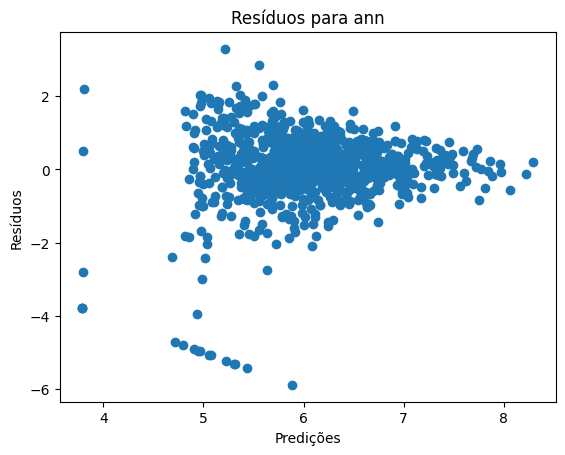

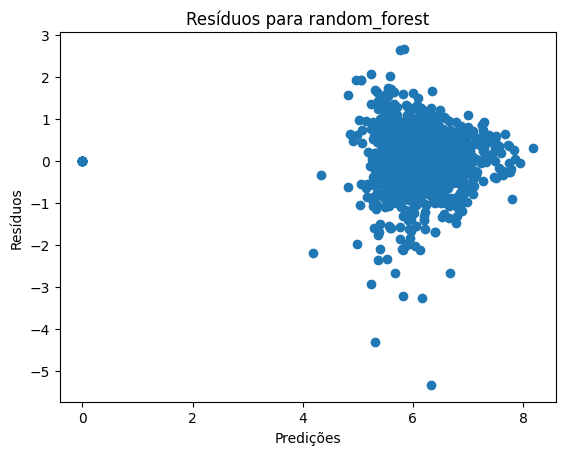

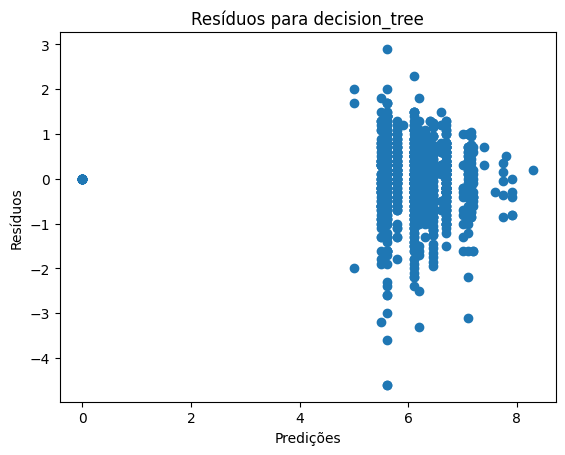

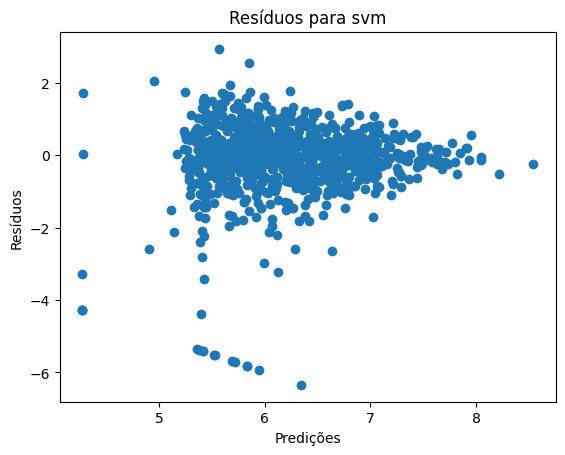

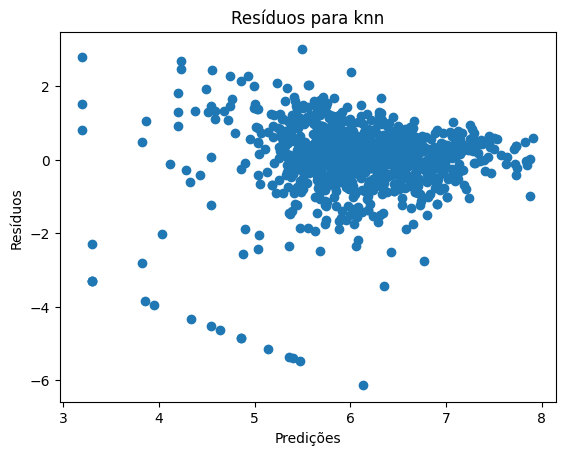

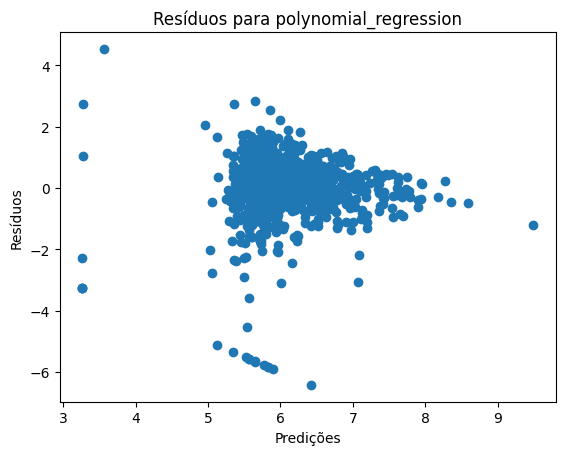

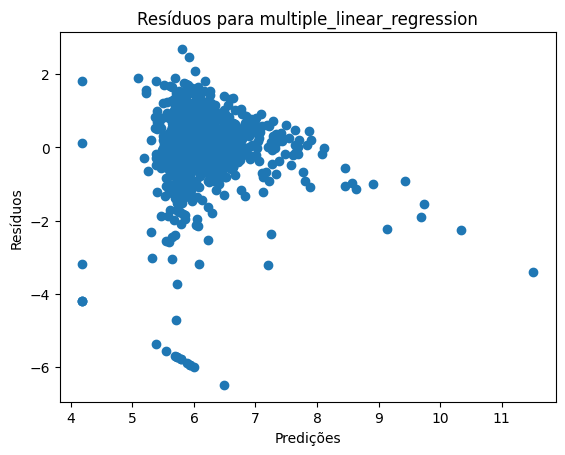

In [95]:
for model_name in residuals_dict:
    current_residuals = residuals_dict[model_name]  # array/Series
    current_y_pred    = y_pred_dict[model_name]      # array/Series

    plt.scatter(current_y_pred, current_residuals)
    plt.xlabel("Predições")
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos para {model_name}")
    plt.show()

In [96]:
grid_search_results

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                        ('Regressor',
                                         MLPRegressor(random_state=42))]),
              param_grid={'Regressor__hidden_layer_sizes': [(20,), (40,),
                                                            (20, 40), (40, 20),
                                                            (20, 40, 60),
                                                            (60, 40, 20)],
                          'Regressor__max_iter': [100, 1000]}),
 GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
              param_grid={'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [4],
                          'min_samples_split': [5],
                          'n_estimators': [10, 50, 100, 300]}),
 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'criterion': ['squared_error', 'absolute_error'],
     

In [97]:
def get_r2_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula R² (comparando y_test e y_pred).
      5) Retorna um dicionário com R² de cada modelo no conjunto de teste.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - r2_dict: {nome_modelo: r2_score_no_teste}
    """

    r2_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino (usando cross-validation)
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Calcula R²
        r2 = r2_score(y_test, y_pred)

        # Armazena no dicionário
        r2_dict[model_name] = r2

    return r2_dict


import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def evaluate_regression(y_true, y_pred):
    """
    Calcula várias métricas de desempenho para modelos de regressão.

    Parâmetros:
    - y_true: valores reais
    - y_pred: valores preditos pelo modelo

    Retorna:
    - Um dicionário contendo as métricas calculadas.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Evitar divisão por zero
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + np.finfo(float).eps)) * 100

    # Log-MSE para valores positivos
    log_mse = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "MAPE (%)": mape,
        "sMAPE (%)": smape,
        "Log-MSE": log_mse
    }

def evaluate_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Avalia múltiplos modelos de regressão e calcula várias métricas para cada um.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds na validação cruzada (default: 5).

    Retorna:
    - DataFrame com as métricas de cada modelo.
    """

    results = []

    for model_name, pipeline, param_grid in models_and_params:
        print(f"A avaliar modelo: {model_name}")

        # GridSearchCV para encontrar os melhores parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Treina o modelo com os melhores parâmetros
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)
        metrics["Modelo"] = model_name  # Adiciona o nome do modelo
        # Calcula as métricas de desempenho
        metrics = evaluate_regression(y_test, y_pred)
        

        # Guarda os resultados
        results.append(metrics)

    # Converte os resultados para um DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

In [ ]:
def adjusted_r2(r2, n, p):
    """
    Calcula o R² ajustado para um modelo de regressão.

    Parâmetros:
    - r2: coeficiente de determinação R²
    - n: número de observações
    - p: número de variáveis independentes (features)

    Retorna:
    - O valor do R² ajustado
    """
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1)) if n > p + 1 else r2  # Evita divisão por zero

def evaluate_regression(model_name,y_true, y_pred, n_features):
    """
    Calcula várias métricas de desempenho para modelos de regressão.

    Parâmetros:
    - y_true: valores reais
    - y_pred: valores preditos pelo modelo
    - n_features: número de variáveis independentes (features utilizadas no modelo)

    Retorna:
    - Um dicionário contendo as métricas calculadas.
    """
    n = len(y_true)  # Número de observações
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    if model_name in ['polynomial_regression', 'multiple_linear_regression']:
        r2_adj = adjusted_r2(r2, n, n_features)
    else: 
        r2_adj = 0

    # Evitar divisão por zero
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + np.finfo(float).eps)) * 100

    # Log-MSE para valores positivos
    log_mse = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "R² Ajustado": r2_adj,
        "MAPE (%)": mape,
        "sMAPE (%)": smape,
        "Log-MSE": log_mse
    }

def evaluate_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Avalia múltiplos modelos de regressão e calcula várias métricas para cada um.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds na validação cruzada (default: 5).

    Retorna:
    - DataFrame com as métricas de cada modelo.
    """

    results = []

    for model_name, pipeline, param_grid in models_and_params:
        print(f"A avaliar modelo: {model_name}")

        # GridSearchCV para encontrar os melhores parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Treina o modelo com os melhores parâmetros
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Número de variáveis preditoras
        n_features = X_train.shape[1]

        # Calcula as métricas de desempenho
        metrics = evaluate_regression(model_name,y_test, y_pred, n_features)

        # Adiciona o nome do modelo como a primeira coluna
        metrics["Modelo"] = model_name

        # Guarda os resultados
        results.append(metrics)

    # Converte os resultados para um DataFrame e coloca o nome do modelo como primeira coluna
    results_df = pd.DataFrame(results).set_index("Modelo")
    
    return results_df


In [112]:
metrics_df = evaluate_all_models(models_and_params, X_train, y_train, X_test, y_test)

A avaliar modelo: ann
A avaliar modelo: random_forest
A avaliar modelo: decision_tree


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


A avaliar modelo: svm
A avaliar modelo: knn
A avaliar modelo: polynomial_regression
A avaliar modelo: multiple_linear_regression


In [113]:
metrics_df

,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),sMAPE (%),Log-MSE
Modelo,,,,,,,,
ann,0.642475,0.955095,0.977290,0.366580,0.000000,3.420740e+16,12.906255,0.063587
random_forest,0.553295,0.580989,0.762227,0.614687,0.000000,1.068917e+01,9.519004,0.015722
decision_tree,0.605879,0.672365,0.819978,0.554087,0.000000,1.165094e+01,10.322357,0.017678
svm,0.642036,1.041580,1.020578,0.309222,0.000000,3.785192e+16,12.721290,0.068997
knn,0.659906,0.957890,0.978718,0.364726,0.000000,3.207350e+16,13.318510,0.061398
polynomial_regression,0.677030,1.091487,1.044743,0.276124,0.272334,3.653298e+16,13.323967,0.068255
multiple_linear_regression,0.696535,1.164473,1.079108,0.227720,0.223676,3.863207e+16,13.485289,0.071752


In [98]:
r2_results = get_r2_all_models(
    models_and_params, 
    X_train, y_train, 
    X_test, y_test, 
    scoring='r2', 
    cv=5
)

# Exibir os resultados
for model_name, r2_val in r2_results.items():
    print(f"Modelo: {model_name} | R² (teste): {r2_val:.4f}")


Modelo: ann | R² (teste): 0.3666
Modelo: random_forest | R² (teste): 0.6147
Modelo: decision_tree | R² (teste): 0.5541
Modelo: svm | R² (teste): 0.3092
Modelo: knn | R² (teste): 0.3647
Modelo: polynomial_regression | R² (teste): 0.2761
Modelo: multiple_linear_regression | R² (teste): 0.2277


 calculo de r2 ajustado para funções lineares

In [99]:
r2_df = pd.DataFrame(
    [(model, r2_val, float('nan')) for model, r2_val in r2_results.items()],
    columns=['model', 'r2', 'r2_adj']
)

for idx, row in r2_df.iterrows():
    if row['model'] in ['polynomial_regression', 'multiple_linear_regression']:
        r2_df.at[idx, 'r2_adj'] = adjusted_r2(row['r2'], X_test)

print(r2_df)

                        model        r2    r2_adj
0                         ann  0.366580       NaN
1               random_forest  0.614687       NaN
2               decision_tree  0.554087       NaN
3                         svm  0.309222       NaN
4                         knn  0.364726       NaN
5       polynomial_regression  0.276124  0.272334
6  multiple_linear_regression  0.227720  0.223676


Os resultados indicam que o Random Forest, com um R² de aproximadamente 0,61, foi o modelo com melhor desempenho no conjunto de teste, superando os restantes algoritmos. Esse resultado reforça a eficácia que  múltiplas árvores de decisão combinadas capturam melhor relações não lineares e reduzem o overfitting em comparação com uma única árvore de decisão.

A Decision Tree, isoladamente, obteve um R² de 0,55, um valor satisfatório, mas inferior ao do Random Forest, o que era esperado, visto que uma única árvore de decisão é mais suscetível a sobreajuste e menos robusta.

A Rede Neural (ANN) apresentou um desempenho inferior ao esperado, com um R² de 0,37, o que pode indicar que a otimização dos seus hiperparâmetros não foi suficiente para capturar as relações complexas dos dados. O fato de o modelo não ter convergido dentro das 100 iterações também pode ter prejudicado seu desempenho.

O Support Vector Machine (SVM) apresentou um R² de 0,31, ficando abaixo dos métodos baseados em árvores. Esse desempenho pode ser consequência de uma escolha inadequada de hiperparâmetros ou da falta de padrões claros nos dados para um modelo de margem como o SVM.

O KNN registrou um R² de 0,36, sugerindo que a simples proximidade entre os exemplos não capturou bem as relações subjacentes nos dados.

A Regressão Polinomial obteve um R² de 0,28 (com um R² ajustado de 0,27), indicando que, mesmo adicionando termos polinomiais às variáveis, o modelo não conseguiu superar os métodos baseados em árvores.

A Regressão Múltipla foi o modelo com pior desempenho, com um R² de 0,23 e um R² ajustado de 0,22, confirmando que os dados podem não seguir uma relação linear simples.

---

# 4. Quais os factores que mais contribuem para o sucesso de um filme?
---

Interpretamos que o sucesso do filme se reflete na sua classificação de avaliação (variável de saída do problema). Assim, para identificar os fatores que mais contribuem para este valor, decidimos utilizar uma regressão baseada em Random Forest, na qual são calculadas as importâncias de cada variável e a respetiva contribuição para a explicação do resultado final.

In [100]:
selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)

# Obter a importância das features (média sobre as árvores) e o desvio padrão
feature_importances = selected_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in selected_model.estimators_],
             axis=0)

# Criar um DataFrame para apresentar resultados
feature_importances_df = pd.DataFrame.from_dict({
    "Feature": X_train.columns,
    "Importance": feature_importances,
    "Std": std
}).sort_values(by="Importance", ascending=False)

# Calcular a importância acumulada (percentagem)
feature_importances_df["Cumulative Importance"] = (
    feature_importances_df["Importance"].cumsum() 
    / feature_importances_df["Importance"].sum()
)

feature_importances_df

,Feature,Importance,Std,Cumulative Importance
4,vote_count,0.520700,0.027703,0.520700
3,runtime,0.178438,0.016607,0.699139
1,popularity,0.142194,0.015836,0.841333
0,budget,0.101655,0.009098,0.942988
2,revenue,0.057012,0.008020,1.000000


A análise da importância das variáveis no modelo de Random Forest revela que o número de votos ("vote_count") é o fator mais determinante na previsão da avaliação de um filme, representando 52,07% da contribuição total. Isto sugere que filmes com um maior número de avaliações tendem a ter uma classificação mais representativa, uma vez que refletem a opinião de um público mais amplo. Segue-se a duração do filme ("runtime"), com 17,84% de importância, indicando que o tempo de ecrã influencia a perceção da qualidade. A popularidade ("popularity"), responsável por 14,22% da variação na avaliação, reforça a ideia de que filmes amplamente discutidos e consumidos tendem a ter classificações mais previsíveis.

Por outro lado, o orçamento ("budget"), com 10,17% de importância, demonstra que, não garante por si só, a previsão de uma avaliação. Por fim, a receita bruta ("revenue") revela-se a variável com menor influência, representando apenas 5,70%. Este dado sugere que um grande sucesso de bilheteira não implica necessariamente uma boa receção crítica, já que fatores como marketing e hype podem impulsionar os lucros sem que estes correspondam à verdadeira qualidade do filme.

De forma geral, podemos dizer que o envolvimento do público, expresso pelo número de votos e pela popularidade, podem ser fatores determinantes na avaliação de um filme, enquanto os aspetos financeiros, como o orçamento e a receita, desempenham um papel secundário.

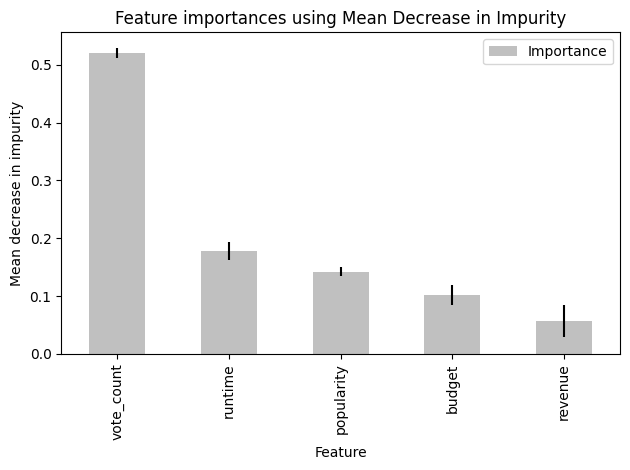

In [101]:
fig, ax = plt.subplots()
feature_importances_df.plot.bar(x="Feature", y="Importance",yerr=std, ax=ax,color="silver")
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 5. Recomendariam o vosso modelo a uma produtora de filmes?

---

a desenvolver! :D